# Name: Miro Marinov
# Author Credits to: josephlee94 

# Coding Companion for Intuitive Deep Learning Part 1 (Annotated)

## Exploring and Processing the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6882 - accuracy: 0.5695 - val_loss: 0.6830 - val_accuracy: 0.6758
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.6732 - val_loss: 0.6775 - val_accuracy: 0.7260
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6928 - val_loss: 0.6720 - val_accuracy: 0.7580
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.7172 - val_loss: 0.6664 - val_accuracy: 0.7763
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.7456 - val_loss: 0.6605 - val_accuracy: 0.7900
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.7573 - val_loss: 0.6549 - val_accuracy: 0.8082
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.7603 - val_loss: 0.6494 - val_accuracy: 0.8128
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8620 - val_loss: 0.3042 - val_accuracy: 0.8858
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8630 - val_loss: 0.3017 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8611 - val_loss: 0.2991 - val_accuracy: 0.8858
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8611 - val_loss: 0.2978 - val_accuracy: 0.8904
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8611 - val_loss: 0.2945 - val_accuracy: 0.8904
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8581 - val_loss: 0.2922 - val_accuracy: 0.8904
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8650 - val_loss: 0.2901 - val_accuracy: 0.8904
Epoch 

In [18]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2901 - accuracy: 0.8950


0.8949771523475647

In [19]:
import matplotlib.pyplot as plt

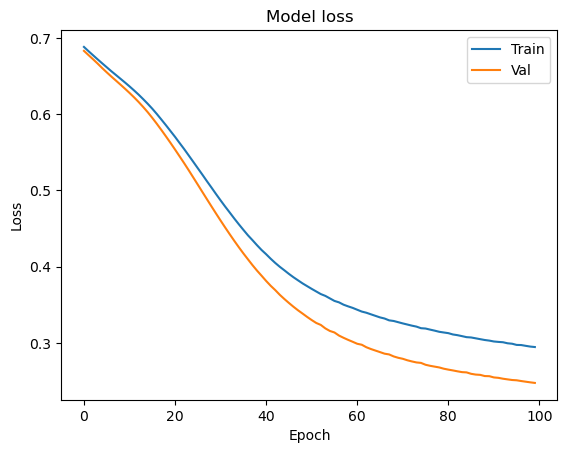

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

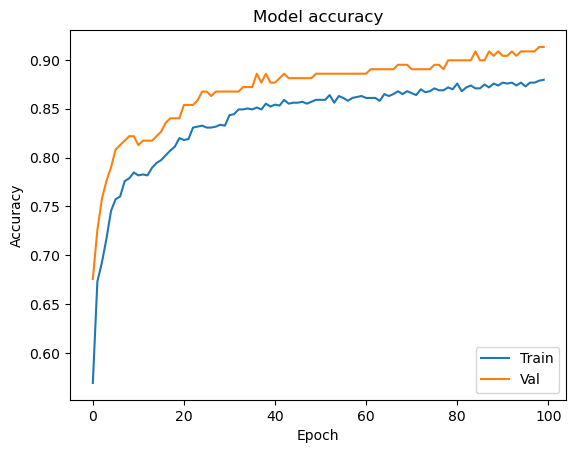

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 39ms/step - loss: 0.5154 - accuracy: 0.7495 - val_loss: 0.3283 - val_accuracy: 0.8813
Epoch 2/100
32/32 [==============================] - 1s 27ms/step - loss: 0.3512 - accuracy: 0.8650 - val_loss: 0.2833 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 37ms/step - loss: 0.3337 - accuracy: 0.8591 - val_loss: 0.3004 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 1s 34ms/step - loss: 0.3337 - accuracy: 0.8542 - val_loss: 0.3109 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2949 - accuracy: 0.8796 - val_loss: 0.2533 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2843 - accuracy: 0.8816 - val_loss: 0.2646 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2691 - accuracy: 0.8855 - val_loss: 0.2134 - val_accuracy: 0.9132
Epoch 

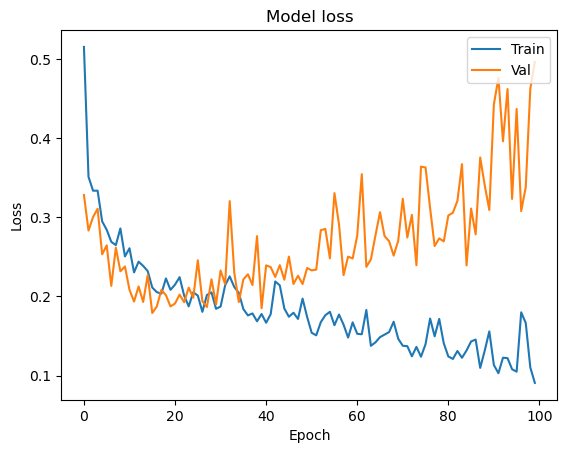

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

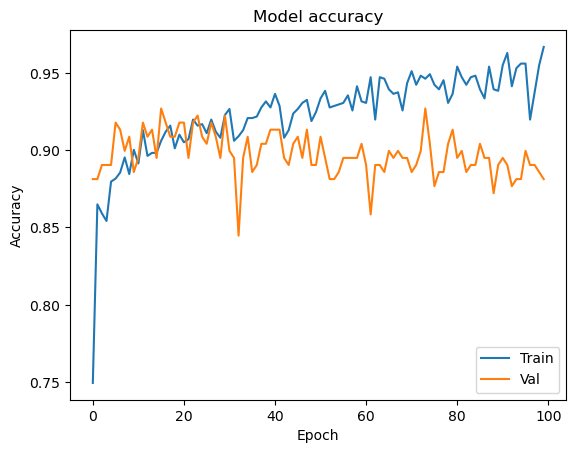

In [28]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [29]:
from keras.layers import Dropout
from keras import regularizers

In [30]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [31]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 52ms/step - loss: 14.2288 - accuracy: 0.6282 - val_loss: 3.9116 - val_accuracy: 0.8447
Epoch 2/100
32/32 [==============================] - 2s 50ms/step - loss: 1.6866 - accuracy: 0.8229 - val_loss: 0.6220 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5909 - accuracy: 0.8571 - val_loss: 0.4706 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5120 - accuracy: 0.8571 - val_loss: 0.4674 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5098 - accuracy: 0.8620 - val_loss: 0.4745 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.4944 - accuracy: 0.8689 - val_loss: 0.4205 - val_accuracy: 0.9132
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.5013 - accuracy: 0.8620 - val_loss: 0.4119 - val_accuracy: 0.9178
Epoch

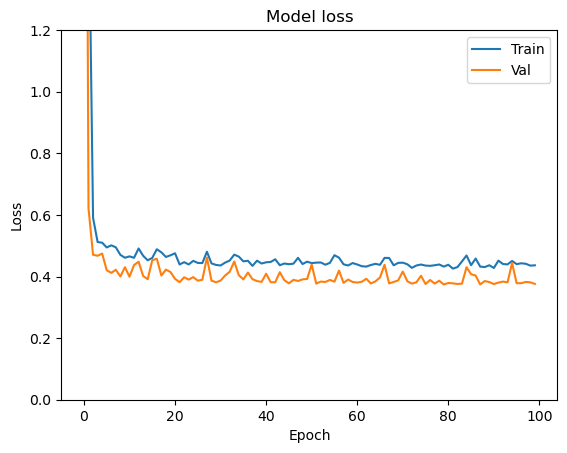

In [32]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

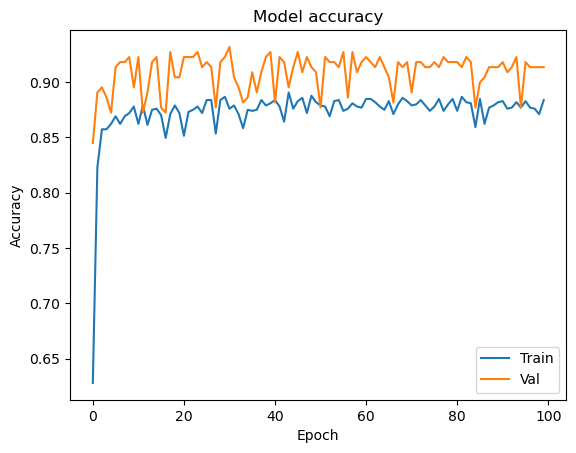

In [34]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()